# Full Model with linear Adaptation and external Input

\begin{align*}
    \partial_t u_e &= -u_e + w_{ee} * P_e(u_e - \theta_e) - w_{ie} * P_i(u_i-\theta_i ) - g f(\alpha) + I_e\\
    \tau \partial_t u_i &= -u_i + w_{ei} * P_e(u_e - \theta_e) - w_{ii} * P_i(u_i-\theta_i ) + I_i\\
    \tau_\alpha \partial_t \alpha &= - \alpha + u_e
\end{align*}

In [2]:
%load_ext autoreload
%autoreload 2
import Adaptation_Functions as Adaptation
import importlib
import sys
sys.path.append("Adaptation/Adaptation_Functions")
def refresh():
    importlib.reload(Adaptation)
refresh()

In [3]:
import numpy as np
import os
import time
import datetime
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
from PIL import Image
import h5py

In [4]:
sigma = {
        "sigma_ee": 1,
        "sigma_ei": 1,
        "sigma_ie": 3,
        "sigma_ii": 3
        }

weights = {
           "nu_ee": 2.2, # 0.24
           "nu_ei": 3.3, # 0.26
           "nu_ie": 2.6,   # 0.33
           "nu_ii": 0.9, # 0.17
          }

inclination_and_threshold = {
                             "beta_e": 5,
                             "beta_i": 5,
                             "theta_e": 0.05,
                             "theta_i": 0.1,
                            }

parameterset = weights | inclination_and_threshold | sigma

# 1) Steady States

\begin{align*}
g_i(u_e) &:= u_i = P_i^{-1} \left( \frac{1}{\nu_{ie}} (-u_e - gf(u_e) + \nu_{ee} P_e(u_e - \theta_e) + I_e) \right) + \theta_i\\

g_e(u_i) &:= u_e = P_e^{-1} \left( \frac{1}{\nu_{ei}} (u_i + \nu_{ii} P_i(u_i - \theta_i) - I_i) \right) + \theta_e

\end{align*}

The steady states are the intersection of $g_e$ and $g_i$.

In [7]:
refresh()
param = parameterset | {"tau_i": 40, "tau_e": 20, "tau_alpha": 1200, 'g': 0.8}
# I_e_slider = widgets.FloatSlider(value=0., min=-0.6, max=1.5, step=0.005, description=r"I_e")
I_e_slider = widgets.FloatSlider(value=0., min=1.1, max=1.2, step=0.001, description=r"I_e")
I_i_slider = widgets.FloatSlider(value=0., min=-0.6, max=0.6, step=0.005, description=r"I_i")
g_slider = widgets.FloatSlider(value=0., min=0, max=2, step=0.01, description=r"g")
ue_lim_slider = widgets.FloatSlider(value=0.5, min=0.1, max=5, step=0.1, description=r"u_e Limit")
ui_lim_slider = widgets.FloatSlider(value=0.2, min=0.1, max=5, step=0.1, description=r"u_i Limit")



def update_parameters(param, I_e, I_i, g, ue_lim, ui_lim):
    # clear_output(wait=True)
    param["g"] = g
    Adaptation.plot_adapt_equilibrium_points(param, I_e=I_e, I_i=I_i,
                                           show_full_stability=True,
                                           ue_lim=(-ue_lim, ue_lim),
                                           ui_lim=(-ui_lim, ui_lim))

widgets.interact(update_parameters,
                 param=widgets.fixed(param),
                 I_e=I_e_slider,
                 I_i=I_i_slider,
                 g=g_slider,
                 ue_lim=ue_lim_slider,
                 ui_lim=ui_lim_slider)

interactive(children=(FloatSlider(value=1.1, description='I_e', max=1.2, min=1.1, step=0.001), FloatSlider(val…

<function __main__.update_parameters(param, I_e, I_i, g, ue_lim, ui_lim)>

In [13]:
refresh()
param = parameterset | {"tau_e": 40, "tau_i": 20, "tau_alpha": 1200, 'g':0.8}
I_e=1.11
I_i=-0.6
du = 1e-6
iterations=20
ue_lim=(0,0.5)
ui_lim = (0, 1.6)
ue2, ui2 = Adaptation.get_adapt_equilibrium_points(param, I_e=I_e, I_i=I_i, ue_lim=ue_lim, ui_lim=ui_lim)
ue1, ui1 = Adaptation.get_adapt_equilibrium_points(param, I_e=I_e, I_i=I_i, du=du, iterations=iterations, ue_lim=ue_lim, ui_lim=ui_lim)
print(ue1, ui1)
print(ue2, ui2)
print('high-res')
for ue_eq, ui_eq in zip(ue1, ui1):
    print(Adaptation.adapt_global_stability(param, ue_eq=ue_eq, ui_eq=ui_eq, k_stop=50))
print('low-res')
for ue_eq, ui_eq in zip(ue2, ui2):
    print(Adaptation.adapt_global_stability(param, ue_eq=ue_eq, ui_eq=ui_eq, k_stop=50))

It is possible, that points of equilibrium have been missed:
We search for ue in [0.00, 0.32]:
Point of Equilibrium close to boundary: ue: 0.04, ui: 0.24
It is possible, that points of equilibrium have been missed:
We search for ue in [0.00, 0.32]:
Point of Equilibrium close to boundary: ue: 0.25, ui: 1.42
It is possible, that points of equilibrium have been missed:
We search for ue in [0.00, 0.32]:
Point of Equilibrium close to boundary: ue: 0.31, ui: 1.57
It is possible, that points of equilibrium have been missed:
We search for ue in [0.00, 0.32]:
Point of Equilibrium close to boundary: ue: 0.04, ui: 0.24
It is possible, that points of equilibrium have been missed:
We search for ue in [0.00, 0.32]:
Point of Equilibrium close to boundary: ue: 0.25, ui: 1.42
It is possible, that points of equilibrium have been missed:
We search for ue in [0.00, 0.32]:
Point of Equilibrium close to boundary: ue: 0.31, ui: 1.57
[0.03882084 0.25478946 0.30972948] [0.23831748 1.42292615 1.57126837]
[0.038

In [10]:
refresh()
param = parameterset | {"tau_e": 40, "tau_i": 20, "tau_alpha": 1200}
I_e_slider = widgets.FloatSlider(value=0., min=-0.6, max=1.5, step=0.005, description=r"I_e")
I_i_slider = widgets.FloatSlider(value=0., min=-0.6, max=0.6, step=0.005, description=r"I_i")
nu_ee_slider = widgets.FloatSlider(value=1., min=0, max=1, step=0.01, description=r"nu_ee")
nu_ei_slider = widgets.FloatSlider(value=1., min=0, max=1, step=0.01, description=r"nu_ei")
nu_ie_slider = widgets.FloatSlider(value=1., min=0, max=1, step=0.01, description=r"nu_ie")
nu_ii_slider = widgets.FloatSlider(value=1., min=0, max=1, step=0.01, description=r"nu_ii")
g_slider = widgets.FloatSlider(value=0., min=0, max=2, step=0.01, description=r"g")
ue_lim_slider = widgets.FloatSlider(value=0.5, min=0.1, max=5, step=0.1, description=r"u_e Limit")
ui_lim_slider = widgets.FloatSlider(value=0.2, min=0.1, max=5, step=0.1, description=r"u_i Limit")



def update_parameters(param, I_e, I_i, g, nu_ee, nu_ei, nu_ie, nu_ii, ue_lim, ui_lim):
    # clear_output(wait=True)
    param["g"] = g
    param["nu_ee"] = nu_ee
    param["nu_ei"] = nu_ei
    param["nu_ie"] = nu_ie
    param["nu_ii"] = nu_ii
    Adaptation.plot_adapt_equilibrium_points(param, I_e=I_e, I_i=I_i,
                                           show_full_stability=True,
                                           ue_lim=(-ue_lim, ue_lim),
                                           ui_lim=(-ui_lim, ui_lim))

widgets.interact(update_parameters,
                 param=widgets.fixed(param),
                 I_e=I_e_slider,
                 I_i=I_i_slider,
                 g=g_slider,
                 nu_ee=nu_ee_slider,
                 nu_ei=nu_ei_slider,
                 nu_ie=nu_ie_slider,
                 nu_ii=nu_ii_slider,
                 ue_lim=ue_lim_slider,
                 ui_lim=ui_lim_slider)

interactive(children=(FloatSlider(value=0.0, description='I_e', max=1.5, min=-0.6, step=0.005), FloatSlider(va…

<function __main__.update_parameters(param, I_e, I_i, g, nu_ee, nu_ei, nu_ie, nu_ii, ue_lim, ui_lim)>

# 2) Local Stability

In the local limit, the system is spatially independent: $u_m (x, t) = u_m (t)$ and $\alpha (x, t) = \alpha (t)$

\begin{align*}
    \tau_e \partial_t u_e &= -u_e + \nu_{e e} P_e(u_e - \theta_e) -\nu_{i e} P_i(u_i-\theta_i ) - g f(\alpha) + I_e\\
    \tau_i \partial_t u_i &= -u_i + \nu_{e i} P_e(u_e - \theta_e) -\nu_{i i} P_i(u_i-\theta_i ) + I_i\\
    \tau_\alpha \partial_t \alpha &= - \alpha + u_e
\end{align*}

We perform a linear stability analysis ($u_m \rightarrow u_m^{eq} + \delta u_m$ and $\alpha \rightarrow \alpha^{eq} + \delta \alpha)$. This results in the following differential equation:

\begin{align*}
    \partial_t
    \begin{pmatrix}
        \delta u_e \\
        \delta u_i \\
        \delta \alpha
    \end{pmatrix}
    =
    \underbrace{
        \begin{bmatrix}
            \tau_e^{-1} (-1 + \nu_{e e} P'_e) & -\tau_e^{-1} \nu_{i e}P'_i & - \tau_e^{-1} g H_\alpha\\
            \tau_i^{-1} \nu_{e i} P'_e & -\tau_i^{-1}(1 + \nu_{i i} P'_i) & 0 \\
            \tau_\alpha^{-1} & 0 & - \tau_\alpha^{-1}
        \end{bmatrix}
        }_{:=J}
    \begin{pmatrix}
        \delta u_e \\
        \delta u_i \\
        \delta \alpha
    \end{pmatrix}
\end{align*}

Where $P'_e = P'(u_e^{eq} - \theta_e)$ and $H_\alpha$ is the Heavieside function applied to alpha

The following Plots show the trajectory of the local system around the steady states

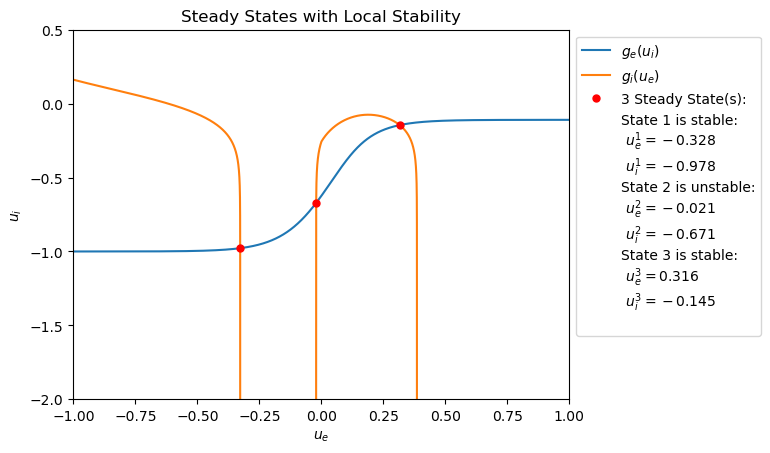

Steady State 1: ui_eq: -0.98, ue_eq: -0.33
Eigenvalues: [-0.1        -0.50008569 -0.19528449]
Stability: True


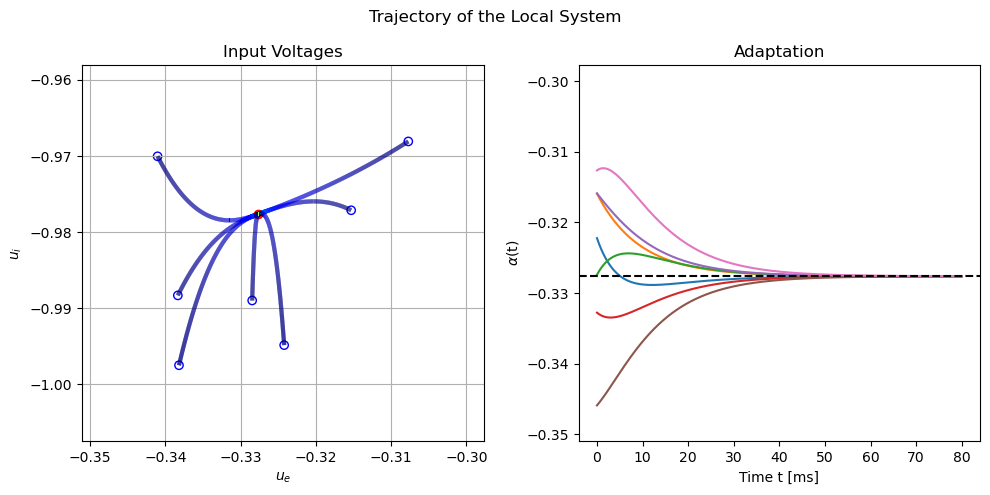

Steady State 2: ui_eq: -0.67, ue_eq: -0.021
Eigenvalues: [-0.1        -0.50069845  0.30063458]
Stability: False


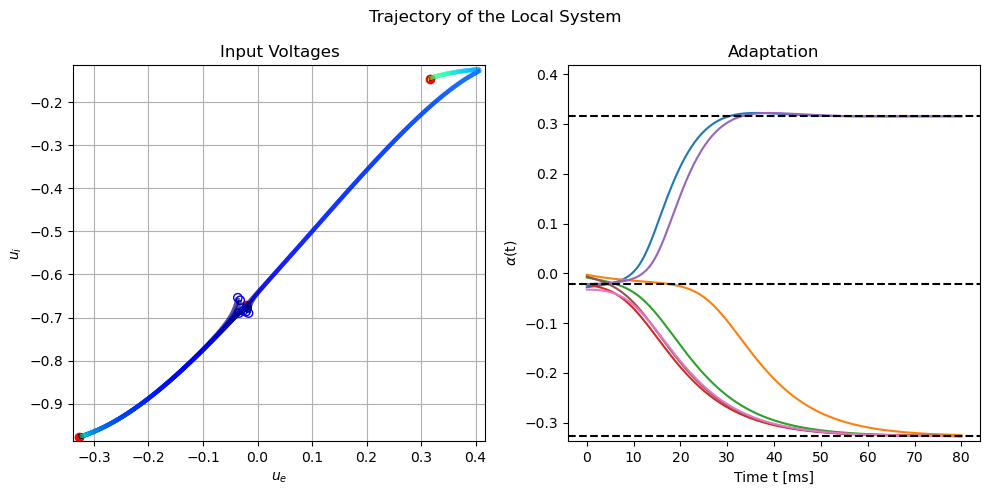

Steady State 3: ui_eq: -0.15, ue_eq: 0.32
Eigenvalues: [-0.7868436 +0.j         -0.13770943+0.12367975j -0.13770943-0.12367975j]
Stability: True


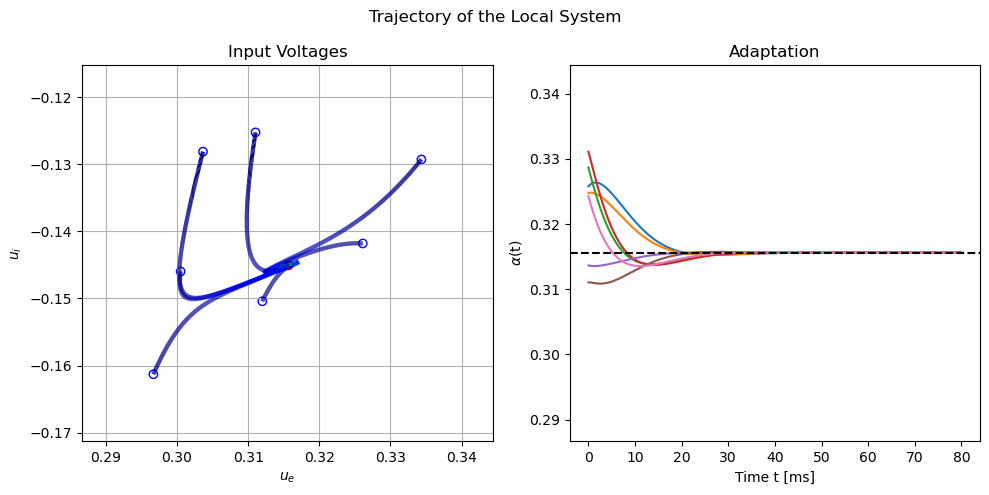

In [84]:
refresh()    
# param = parameterset | {"tau_e": 1, "tau_i": 3, "tau_alpha": 1}
param = {
         "nu_ee": 1,
         "nu_ie": 1,
         "nu_ei": 1,
         "nu_ii": 1,
         }
param = param | sigma | inclination_and_threshold | {"tau_e": 4, "tau_i": 2, "tau_alpha": 10}
param["g"] = 0.6
I_e = -0.35
I_i = -1.
ui_lim = (-2, 0.5)
ue_lim = (-1, 1)
Adaptation.local_stability_trajectory(param,
                                      I_e=I_e,
                                      I_i=I_i,
                                      ue_lim=ue_lim,
                                      ui_lim=ui_lim,
                                      plot_alpha=True,
                                      automatic_bounds=True,
                                      trajectories=7,
                                      pert=2e-2,
                                      stop_time=80)

# 3) Full System Stability


\begin{align*}
    \partial_t
    \begin{pmatrix}
        \delta \hat{u}_e \\
        \delta \hat{u}_i \\
        \delta \hat{\alpha}
    \end{pmatrix}
    =
    \underbrace{
        \begin{bmatrix}
            \tau_e^{-1}(-1 + \hat{w}_{ee} P'_e) & -\tau_e^{-1} \hat{w}_{ie} P'_i & -\tau_e^{-1} g H_{\alpha} \\
            \tau_i^{-1} \hat{w}_{ei} P'_e & -\tau_i^{-1}(1 + \hat{w}_{ii} P'_i) & 0 \\
            \tau_{\alpha}^{-1} & 0 & -\tau_{\alpha}^{-1}
        \end{bmatrix}
        }_{:=A(k)}
    \begin{pmatrix}
        \delta \hat{u}_e \\
        \delta \hat{u}_i \\
        \delta \hat{\alpha}
    \end{pmatrix}
\end{align*}

In [8]:
param = parameterset
param["tau_e"] = 20
param["tau_i"] = 40
param["tau_alpha"] = 1200
param["g"] = 0.8
wmn_hat = Adaptation.fourier_gaussian_connectivity

I_e_slider = widgets.FloatSlider(value=-1, min=-1.5, max=2, step=0.005, description=r"I_e")
I_i_slider = widgets.FloatSlider(value=-3, min=-3, max=1, step=0.005, description=r"I_i")

du = 1e-5

ue_lim = (-4, 3)
ui_lim = (-4, 4)

def update_parameters(param, I_e, I_i):

    ue1, ui1 = Adaptation.g_e_line(param, I_i, ui_lim=ui_lim, du=du)
    ue2, ui2 = Adaptation.g_i_line(param, I_e, ue_lim=ue_lim, du=du)
    
    ue, ui = Adaptation.get_adapt_equilibrium_points(param=param,
                                                   I_e=I_e, I_i=I_i, du=du,
                                                   ue_lim=ue_lim, ui_lim=ui_lim, warning=False,
                                                   improve_solution=True)
    
    # Plot on the respective subplot
    plt.plot(ue1, ui1, label=r"$g_e$")
    plt.plot(ue2, ui2, label=r"$g_i$")
    full_label=False
    local_label=False
    unstable_label=False
    for ue_eq, ui_eq in zip(ue, ui):
        color='red'
        if not Adaptation.local_stability(param, ue_eq=ue_eq, ui_eq=ui_eq):
            if local_label:
                plt.scatter(ue_eq, ui_eq, s=80, c=color, marker='x')
            else:
                local_label = True
                plt.scatter(ue_eq, ui_eq, s=80, c=color, marker='x', label="Locally unstable")
                
        elif Adaptation.adapt_global_stability(param=param, ue_eq=ue_eq, ui_eq=ui_eq, wmn_hat=wmn_hat):
            if full_label:
                plt.scatter(ue_eq, ui_eq, s=80, c=color, marker='o')
            else:
                full_label = True
                plt.scatter(ue_eq, ui_eq, s=80, c=color, marker='o', label="Stable")
        else: 
            if unstable_label:
                plt.scatter(ue_eq, ui_eq, s=150, c=color, marker='*')
            else:
                unstable_label = True
                plt.scatter(ue_eq, ui_eq, s=150, c=color, marker='*', label="Turing unstable")
    plt.title(r"$I_e$" + f" = {I_e:.1f}, " + r"$I_i$" + f" = {I_i:.1f}", fontsize=14)
    plt.xlabel(r"$u_e$", fontsize=14)
    plt.ylabel(r"$u_i$", fontsize=14)
    plt.xlim(ue_lim)
    plt.ylim(ui_lim)
    plt.axvline(0, color='black', lw=0.3)
    plt.axhline(0, color='black', lw=0.3)

    plt.legend(loc="upper right")
    # Adjust layout
    plt.show()

widgets.interact(update_parameters,
                 param=widgets.fixed(param),
                 I_e=I_e_slider,
                 I_i=I_i_slider)



interactive(children=(FloatSlider(value=-1.0, description='I_e', max=2.0, min=-1.5, step=0.005), FloatSlider(v…

<function __main__.update_parameters(param, I_e, I_i)>